## Гауссово распределение, линейный дискриминантный анализ и наивный байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal` 
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

### 3. Бинарная классификация

**Задание** 
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью логарифмов левой и правой частей уравнения (4) (лучше упростить выражение). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание** 
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание** 
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

## Выполнение

Ковариационная матрица повернутого распределения:
 [[0.1234299  0.11556125]
 [0.11556125 0.125997  ]]


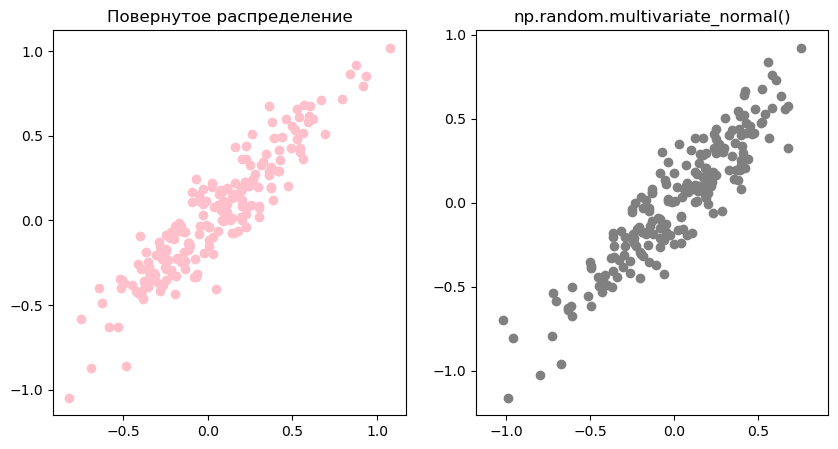

In [6]:
## 1

import numpy as np
import matplotlib.pyplot as plt

# Задаём параметры
M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha = np.radians(45)  # Угол поворота в радианах

# Шаг 1: Генерация двумерного гауссовского распределения
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

# Шаг 2: Матрица поворота
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                            [np.sin(alpha), np.cos(alpha)]])

# Шаг 3: Поворот точек
X_rotated = X.dot(rotation_matrix)

# Шаг 4: Ковариационная матрица
cov_matrix_rotated = np.cov(X_rotated.T)
print("Ковариационная матрица повернутого распределения:\n", cov_matrix_rotated)

# Шаг 5: Генерация выборки с помощью multivariate_normal
mean = [0, 0]
cov = [[sigma1**2, 0], [0, sigma2**2]]  # Ковариационная матрица исходного распределения
X_mv = np.random.multivariate_normal(mean, cov_matrix_rotated, M)

# Шаг 6: Визуализация
plt.figure(figsize=(10, 5))

# Повернутое распределение
plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], color='pink', label='Повернутое распределение')
plt.title("Повернутое распределение")
plt.axis('equal')

# Сравнение с multivariate_normal
plt.subplot(1, 2, 2)
plt.scatter(X_mv[:, 0], X_mv[:, 1], color='grey', label='np.random.multivariate_normal()')
plt.title("np.random.multivariate_normal()")
plt.axis('equal')

plt.show()

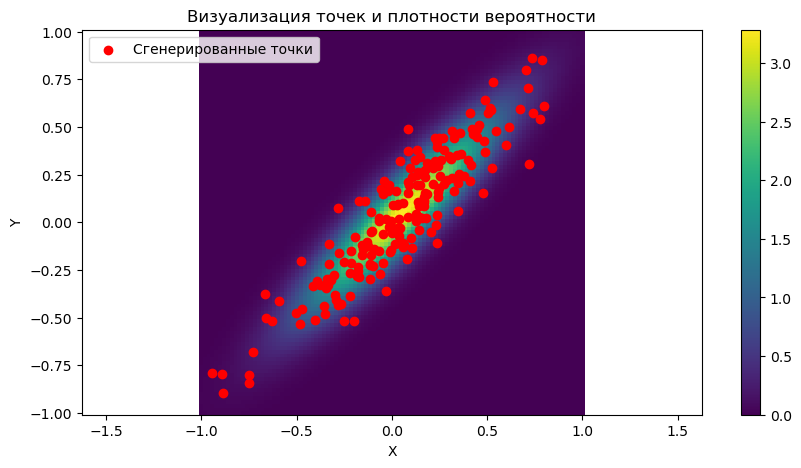

In [7]:
## 2
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

# Параметры генерации выборки
M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha = np.radians(45)  # Угол поворота в радианах

# Шаг 1: Генерация двумерного гауссовского распределения
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

# Матрица поворота
rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                            [np.sin(alpha), np.cos(alpha)]])
X_rotated = X.dot(rotation_matrix)

# Вычисление среднего значения и ковариационной матрицы
mean_rotated = np.mean(X_rotated, axis=0)
cov_rotated = np.cov(X_rotated.T)

# Шаг 2: Визуализация плотности вероятности
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
grid_points = np.stack([XX.flatten(), YY.flatten()], axis=1)

# Создание гауссовского распределения с рассчитанными параметрами
m = multivariate_normal(mean=mean_rotated, cov=cov_rotated)
ZZ = m.pdf(grid_points).reshape(XX.shape)

# Шаг 3: Визуализация набора точек и плотности вероятности
plt.figure(figsize=(10, 5))

# Отображение плотности вероятности
IMG = plt.pcolor(XX, YY, ZZ, shading='auto')
plt.colorbar(IMG)

# Наложение точек выборки
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], c='red', label='Сгенерированные точки')

plt.title("Визуализация точек и плотности вероятности")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis('equal')
plt.show()

In [8]:
## 3.1
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

# Шаг 1: Генерация датасета для двух классов
M = 200  # Количество точек в каждом классе

# Параметры для класса 0
mean_0 = [0, 0]
cov_0 = [[0.3, 0], [0, 0.3]]  # Ковариационная матрица класса 0
X_0 = np.random.multivariate_normal(mean_0, cov_0, M)

# Параметры для класса 1
mean_1 = [1, 1]
cov_1 = [[0.2, 0], [0, 0.2]]  # Ковариационная матрица класса 1
X_1 = np.random.multivariate_normal(mean_1, cov_1, M)

# Объединение классов в один датасет
X = np.vstack((X_0, X_1))
y = np.hstack((np.zeros(M), np.ones(M)))

# Шаг 2: Вычисление средних значений и ковариационных матриц
mean_0_calc = np.mean(X_0, axis=0)
mean_1_calc = np.mean(X_1, axis=0)
cov_0_calc = np.cov(X_0, rowvar=False)
cov_1_calc = np.cov(X_1, rowvar=False)

print("Среднее значение класса 0:", mean_0_calc)
print("Ковариационная матрица класса 0:\n", cov_0_calc)
print("Среднее значение класса 1:", mean_1_calc)
print("Ковариационная матрица класса 1:\n", cov_1_calc)

Среднее значение класса 0: [ 0.00857559 -0.04814156]
Ковариационная матрица класса 0:
 [[0.3334356  0.01252694]
 [0.01252694 0.29250416]]
Среднее значение класса 1: [0.99323517 0.98481212]
Ковариационная матрица класса 1:
 [[0.18595186 0.03132089]
 [0.03132089 0.17375403]]


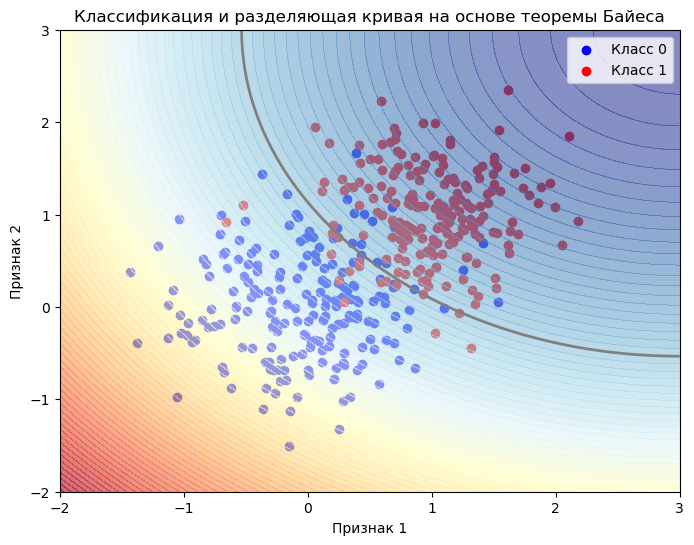

In [9]:
## 3.2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Шаг 1: Генерация данных для двух классов
M = 200
mean_0 = [0, 0]
cov_0 = [[0.3, 0], [0, 0.3]]
X_0 = np.random.multivariate_normal(mean_0, cov_0, M)

mean_1 = [1, 1]
cov_1 = [[0.2, 0], [0, 0.2]]
X_1 = np.random.multivariate_normal(mean_1, cov_1, M)

X = np.vstack((X_0, X_1))
y = np.hstack((np.zeros(M), np.ones(M)))

# Шаг 2: Оценка вероятности для каждого класса
p_y0 = 0.5
p_y1 = 0.5

pdf_0 = multivariate_normal(mean_0, cov_0)
pdf_1 = multivariate_normal(mean_1, cov_1)

# Шаг 3: Определение сетки для визуализации
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 3, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

log_p_x_given_y0 = np.log(pdf_0.pdf(grid_points))
log_p_x_given_y1 = np.log(pdf_1.pdf(grid_points))

# Шаг 4: Разность логарифмов правдоподобий
log_diff = (log_p_x_given_y1 - log_p_x_given_y0).reshape(xx.shape)

# Шаг 5: Визуализация
plt.figure(figsize=(8, 6))

# Визуализация точек классов
plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', label='Класс 0')
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', label='Класс 1')

# Визуализация фона на основе разности логарифмов
plt.contourf(xx, yy, log_diff, levels=100, cmap='RdYlBu', alpha=0.6)

# Построение разделяющей кривой (где разность логарифмов равна 0)
plt.contour(xx, yy, log_diff, levels=[0], colors='grey', linewidths=2)

plt.title("Классификация и разделяющая кривая на основе теоремы Байеса")
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

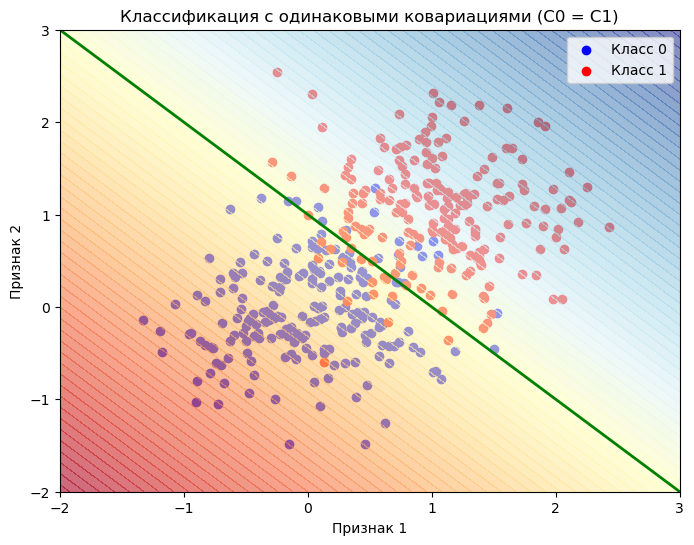

In [10]:
## 4
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Параметры для классов
M = 200
mean_0 = [0, 0]
mean_1 = [1, 1]
cov = [[0.3, 0], [0, 0.3]]  # одинаковая ковариационная матрица

# Генерация данных для классов
X_0 = np.random.multivariate_normal(mean_0, cov, M)
X_1 = np.random.multivariate_normal(mean_1, cov, M)

X = np.vstack((X_0, X_1))
y = np.hstack((np.zeros(M), np.ones(M)))

# Оценка вероятности для каждого класса
p_y0 = 0.5
p_y1 = 0.5

pdf_0 = multivariate_normal(mean_0, cov)
pdf_1 = multivariate_normal(mean_1, cov)

# Определение сетки для визуализации
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 3, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

log_p_x_given_y0 = np.log(pdf_0.pdf(grid_points))
log_p_x_given_y1 = np.log(pdf_1.pdf(grid_points))

# Разность логарифмов правдоподобий
log_diff = (log_p_x_given_y1 - log_p_x_given_y0).reshape(xx.shape)

# Визуализация
plt.figure(figsize=(8, 6))

# Визуализация точек классов
plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', label='Класс 0')
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', label='Класс 1')

# Визуализация фона на основе разности логарифмов
plt.contourf(xx, yy, log_diff, levels=100, cmap='RdYlBu', alpha=0.6)

# Построение разделяющей кривой (где разность логарифмов равна 0)
plt.contour(xx, yy, log_diff, levels=[0], colors='green', linewidths=2)

plt.title("Классификация с одинаковыми ковариациями (C0 = C1)")
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

In [11]:
import numpy as np
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        self.mu_0 = None
        self.mu_1 = None
        self.cov_inv = None
        self.prior_0 = None
        self.prior_1 = None

    def fit(self, X, y):
        # Разделение данных по классам
        X_0 = X[y == 0]
        X_1 = X[y == 1]

        # Оценка средних для каждого класса
        self.mu_0 = np.mean(X_0, axis=0)
        self.mu_1 = np.mean(X_1, axis=0)

        # Оценка ковариационной матрицы и её инверсии (одинаковая для обоих классов)
        cov_0 = np.cov(X_0, rowvar=False)
        cov_1 = np.cov(X_1, rowvar=False)
        self.cov_inv = np.linalg.inv((cov_0 + cov_1) / 2)

        # Оценка априорных вероятностей для каждого класса
        self.prior_0 = len(X_0) / len(X)
        self.prior_1 = len(X_1) / len(X)

    def predict(self, X):
        # Линейное дискриминантное правило
        discriminant_0 = X @ self.cov_inv @ self.mu_0 - 0.5 * self.mu_0.T @ self.cov_inv @ self.mu_0 + np.log(self.prior_0)
        discriminant_1 = X @ self.cov_inv @ self.mu_1 - 0.5 * self.mu_1.T @ self.cov_inv @ self.mu_1 + np.log(self.prior_1)

        return (discriminant_1 > discriminant_0).astype(int)

In [12]:
# Генерация данных
M = 200
mean_0 = [0, 0]
mean_1 = [1, 1]
cov = [[0.3, 0], [0, 0.3]]
X_0 = np.random.multivariate_normal(mean_0, cov, M)
X_1 = np.random.multivariate_normal(mean_1, cov, M)
X = np.vstack((X_0, X_1))
y = np.hstack((np.zeros(M), np.ones(M)))

# Обучение и предсказание
lda = myLDA()
lda.fit(X, y)
y_pred = lda.predict(X)

# Проверка точности
accuracy = np.mean(y_pred == y)
print(f'Точность: {accuracy:.2f}')

Точность: 0.90


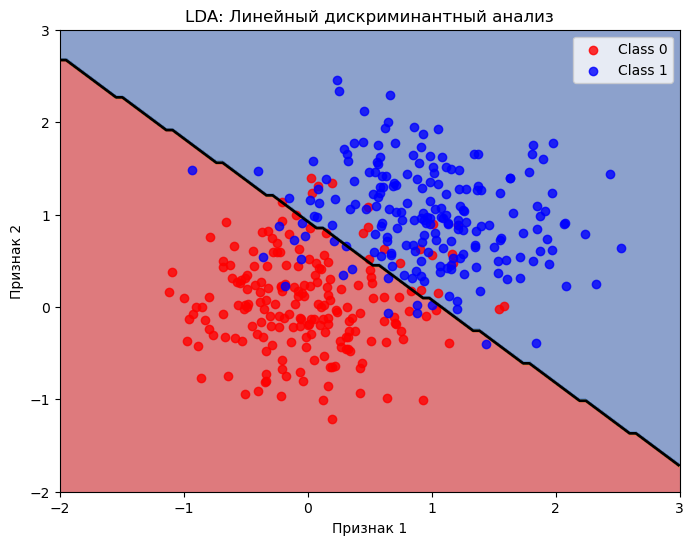

In [13]:
# Визуализация
xx, yy = np.meshgrid(np.linspace(-2, 3, 100), np.linspace(-2, 3, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Прогноз на сетке
Z = lda.predict(grid_points).reshape(xx.shape)

# Построение графика
plt.figure(figsize=(8, 6))

# Контурная заливка для классов
plt.contourf(xx, yy, Z, alpha=0.6, cmap='RdYlBu')

# Точки классов
plt.scatter(X_0[:, 0], X_0[:, 1], color='red', label='Class 0', alpha=0.8)
plt.scatter(X_1[:, 0], X_1[:, 1], color='blue', label='Class 1', alpha=0.8)

# Разделяющая линия
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)

plt.title('LDA: Линейный дискриминантный анализ')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()

plt.show()

In [14]:
## 5
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.mean_ = {}
        self.var_ = {}
        self.priors_ = {}

    def fit(self, X, y):
        # Выделение уникальных классов
        classes = np.unique(y)
        self.classes_ = classes

        # Оценка параметров для каждого класса
        for c in classes:
            X_c = X[y == c]
            self.mean_[c] = np.mean(X_c, axis=0)  # Средние по признакам
            self.var_[c] = np.var(X_c, axis=0)    # Дисперсии по признакам
            self.priors_[c] = X_c.shape[0] / X.shape[0]  # Априорная вероятность класса

    def gaussian_likelihood(self, x, mean, var):
        # Функция плотности вероятности для гауссовского распределения
        eps = 1e-6  # Чтобы избежать деления на 0
        coeff = 1 / np.sqrt(2 * np.pi * var + eps)
        exponent = np.exp(-(x - mean) ** 2 / (2 * var + eps))
        return coeff * exponent

    def predict_log_proba(self, X):
        log_probs = []
        for x in X:
            class_log_probs = {}
            for c in self.classes_:
                prior = np.log(self.priors_[c])  # Логарифм априорной вероятности
                likelihood = np.sum(np.log(self.gaussian_likelihood(x, self.mean_[c], self.var_[c])))
                class_log_probs[c] = prior + likelihood
            log_probs.append(class_log_probs)
        return log_probs

    def predict(self, X):
        log_probs = self.predict_log_proba(X)
        return np.array([max(log_prob, key=log_prob.get) for log_prob in log_probs])



Accuracy: 0.81


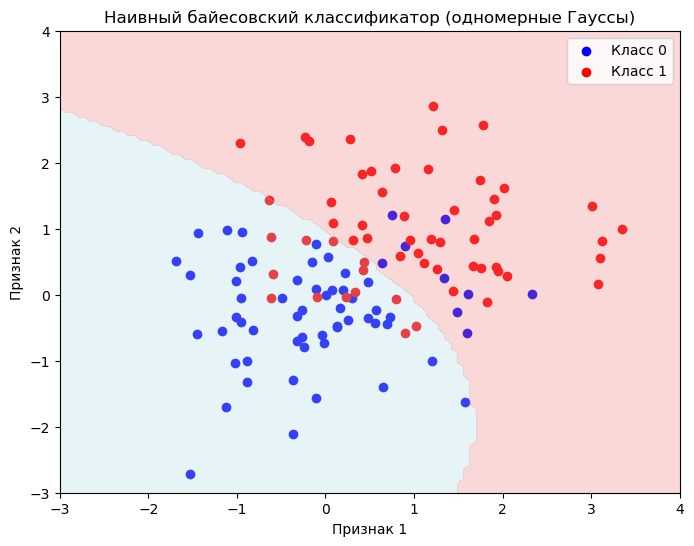

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Генерация данных для двух классов
M = 200
mean_0 = [0, 0]
mean_1 = [1, 1]
cov = [[0.8, 0], [0, 0.8]]  # ковариационная матрица
X_0 = np.random.multivariate_normal(mean_0, cov, M)
X_1 = np.random.multivariate_normal(mean_1, cov, M)

X = np.vstack((X_0, X_1))
y = np.hstack((np.zeros(M), np.ones(M)))

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение классификатора
nb = myNB()
nb.fit(X_train, y_train)

# Прогнозирование
y_pred = nb.predict(X_test)

# Оценка точности
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.2f}')

# Построение сетки для визуализации
xx, yy = np.meshgrid(np.linspace(-3, 4, 100), np.linspace(-3, 4, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Получение предсказаний на сетке
Z = nb.predict(grid_points)
Z = Z.reshape(xx.shape)

# Визуализация результатов
plt.figure(figsize=(8, 6))

# Визуализация точек тестовых данных
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='blue', label='Класс 0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='red', label='Класс 1')

# Визуализация разделяющей поверхности
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], colors=['lightblue', 'lightcoral'], alpha=0.3)

plt.title("Наивный байесовский классификатор (одномерные Гауссы)")
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

In [16]:
## 6
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Создаем датасет для бинарной классификации
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Реализация LDA из предыдущего задания (добавьте ваш код LDA сюда)
lda = myLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Метрики для LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

print(f"LDA - Accuracy: {accuracy_lda:.2f}, Precision: {precision_lda:.2f}, Recall: {recall_lda:.2f}")

LDA - Accuracy: 0.89, Precision: 0.94, Recall: 0.83


In [18]:
# Реализация Naive Bayes из предыдущего задания (добавьте ваш код NB сюда)
nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

# Метрики для Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print(f"Naive Bayes - Accuracy: {accuracy_nb:.2f}, Precision: {precision_nb:.2f}, Recall: {recall_nb:.2f}")

Naive Bayes - Accuracy: 0.88, Precision: 0.93, Recall: 0.84


In [19]:
print("Сравнение LDA и Naive Bayes:")
print(f"LDA - Accuracy: {accuracy_lda:.2f}, Precision: {precision_lda:.2f}, Recall: {recall_lda:.2f}")
print(f"Naive Bayes - Accuracy: {accuracy_nb:.2f}, Precision: {precision_nb:.2f}, Recall: {recall_nb:.2f}")

Сравнение LDA и Naive Bayes:
LDA - Accuracy: 0.89, Precision: 0.94, Recall: 0.83
Naive Bayes - Accuracy: 0.88, Precision: 0.93, Recall: 0.84


## Анализ показал, что чууууууть точнее метод LDA, но лишь чуть чуть, но лично мне показалось, что реализация наивного сложнее нежеле лда, поэтому используем лда!!!